# MODEL SELECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
# Pipeline function: model training and prediction, direction to visualisation function and metrics function 

def road(model, name):
    
    model.fit(X_train, y_train)
    dump(model, f'model_{name}.joblib')
    
    # model accuracy (train)
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:,1]
    print(f'{name} model accuracy (train)):', accuracy_score(y_train, y_train_pred))

    # model visualisation
    model_visualisation_function(y_train_pred,y_train_pred_proba,y_train, name)
    try:
        print(f'{name}.coef :\n', model.coef_)
        print(f'{name}.intercept :', model.intercept_)
    except: 
        pass

    # test prediction and classification metrics
    y_test_pred = model.predict(X_test)
    estimator_,accuracy_,f1_,precision_,recall_,cnf_matrix_ = classification_metrics_function(y_test,
                                                                                          y_test_pred,log_regression,name)

In [3]:
# the function builds a plot showing true and predicted diagnosis with prediction probability

def model_visualisation_function(y_pred, y_pred_proba, y, name):
    
    plt.scatter(y_pred, y_pred_proba, c=y, cmap='copper')
    plt.xlabel('y predicted')
    plt.ylabel('y predicted_probability')
    plt.title(f'\n{name} model visualization')
    plt.show()

In [4]:
# the function shows classification metrics, confusion matrix, ROC curve.

def classification_metrics_function(y_test, y_pred, estimator, name):
    
    # classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)             
    
    print('\nClassification metrics:')
    print(f'{name}_accuracy_score : {accuracy:.4f}')  
    print(f'{name}_f1_score : {f1:.4f}')   
    print(f'{name}_precision_score : {precision:.4f}')
    print(f'{name}_recall_score : {recall:.4f}')
    
    # confusion matrix
    print(f'\n{name}_cnf_matrix')
    cnf_matrix = confusion_matrix(y_test, y_pred, normalize='all')
    print(cnf_matrix)
    
    ax = plt.axes()
    sns.heatmap(cnf_matrix, cmap="RdGy", annot=True, fmt='g', ax=ax)
    ax.set_title(f'\n{name} confusion matrix')
    plt.show()
    
    # precision-recall curve
    prc_display = PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test, name=name, color='crimson')  
    _ = prc_display.ax_.set_title(f'\n{name} Precision-Recall curve')   
    plt.show()
    
    # ROC curve
    roc_display = RocCurveDisplay.from_estimator(estimator, X_test, y_test, name=name, color='crimson')
    _ = roc_display.ax_.set_title(f'\n{name} ROC curve')
    plt.show()
    
    # to metrics resulting table
    estimator_.append(name)
    accuracy_.append(accuracy)
    f1_.append(f1)
    precision_.append(precision)
    recall_.append(recall)
    cnf_matrix_.append(cnf_matrix)
    
    return estimator_, accuracy_, f1_, precision_, recall_, cnf_matrix_  

In [5]:
# the function transforms a confusion matrix to separate lists

def conf_matrix_transformation(cnf_matrix_):
    b, b_false, m, m_false = [],[],[],[]

    for i in range(len(cnf_matrix_)):
        z=1
        for j in cnf_matrix_[i]:
            if z==1:
                b.append(j[0])
                b_false.append(j[1])
            elif z==2:
                m_false.append(j[0])
                m.append(j[1])   
            z+=1
    return b, b_false, m, m_false

In [6]:
# the function builds bar plots to compare metrics and false-true prediction for different models

def metrics_compar_plot(metrics, titles):
    for i in range(len(metrics)):
        fig_, ax = plt.subplots(figsize=(4, 2))
    
        ax.bar(estimator_, metrics[i], width=0.8, color ='lightsteelblue')
        ax.set(xticks=estimator_)    
        plt.title(titles[i])
        plt.show()

### PREPROCESSED DATASET LOADING AND SPLIT

In [7]:
data = pd.read_csv('processed_data')

# target - features split
X = data.iloc[:, 1:9]
y = data['y']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('target :', y.shape)
print('features :', X.shape)
print('train_target :', y_train.shape)
print('train_features :', X_train.shape)
print('test_target :', y_test.shape)
print('test_features :', X_test.shape)

target : (569,)
features : (569, 8)
train_target : (398,)
train_features : (398, 8)
test_target : (171,)
test_features : (171, 8)


### MODEL SELECTION
Models: 
- Logistic regression, 
- Linear discriminant analysis, 
- Quadratic discriminant analysis,
- Support Vector Machines,
- Gaussian Naive Bayes

In [8]:
# to metrics resulting table
estimator_, accuracy_, f1_, precision_, recall_, cnf_matrix_ = [],[],[],[],[],[]

### Logistic Regression

LGR model accuracy (train)): 0.9170854271356784


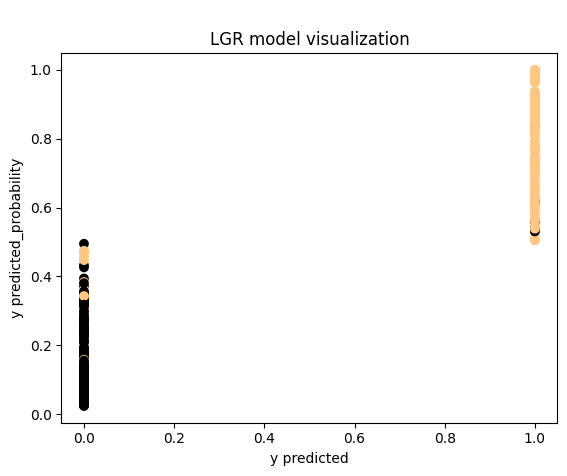

LGR.coef :
 [[4.2267038  2.75956028 0.41896346 0.97999966 2.69729333 4.43988763
  2.10493468 0.50988828]]
LGR.intercept : [-7.35826795]

Classification metrics:
LGR_accuracy_score : 0.9591
LGR_f1_score : 0.9457
LGR_precision_score : 0.9683
LGR_recall_score : 0.9242

LGR_cnf_matrix
[[0.60233918 0.01169591]
 [0.02923977 0.35672515]]


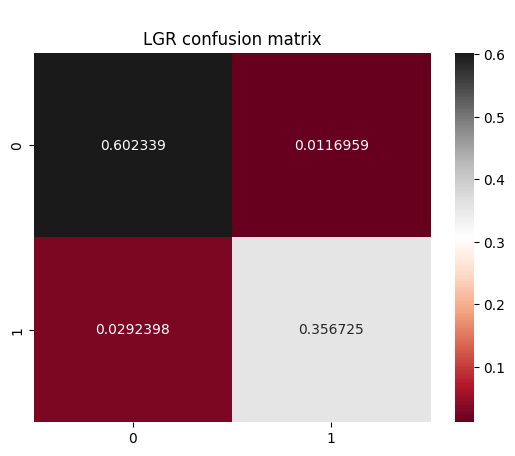

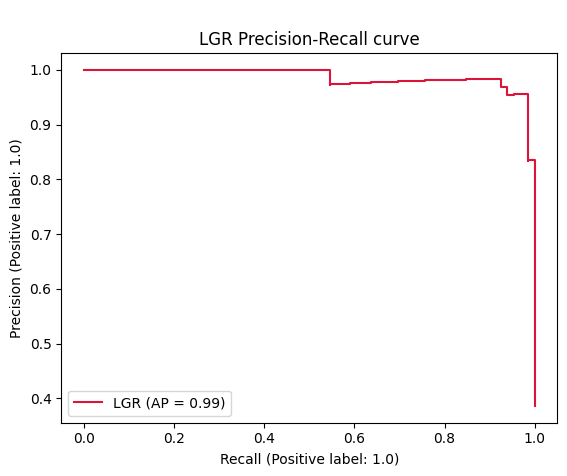

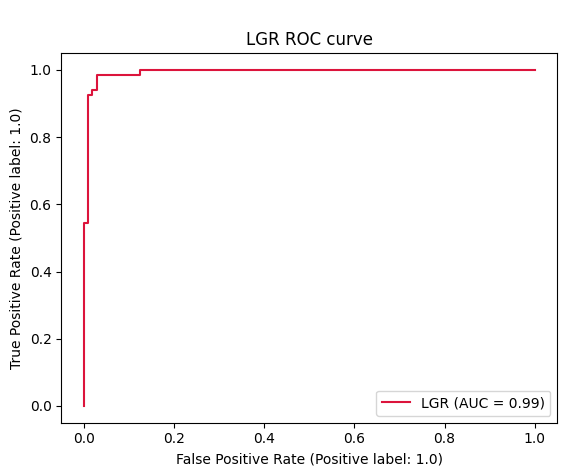

In [9]:
log_regression = LogisticRegression()
road(log_regression, 'LGR')



### LDA - LinearDiscriminantAnalysis

LDA model accuracy (train)): 0.9447236180904522


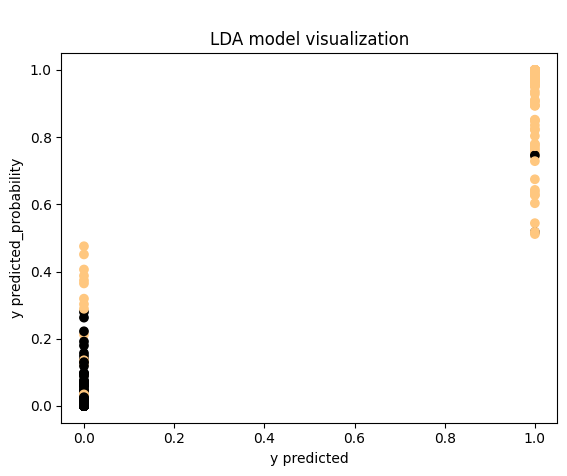

LDA.coef :
 [[ 24.8284366   12.24074072   6.35646965 -19.03621343   1.10468694
   15.86662698  13.05786265  21.44079229]]
LDA.intercept : [-36.73929793]

Classification metrics:
LDA_accuracy_score : 0.9532
LDA_f1_score : 0.9365
LDA_precision_score : 0.9833
LDA_recall_score : 0.8939

LDA_cnf_matrix
[[0.60818713 0.00584795]
 [0.04093567 0.34502924]]


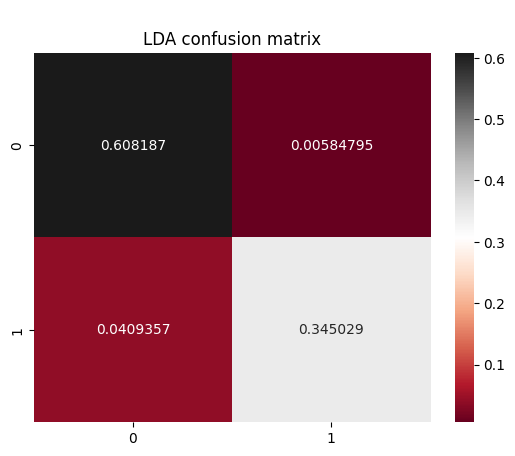

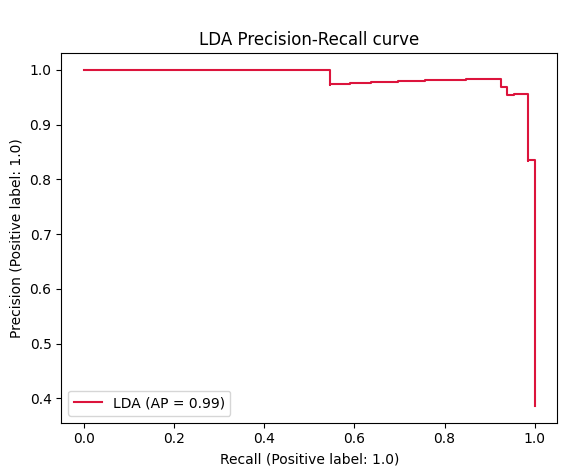

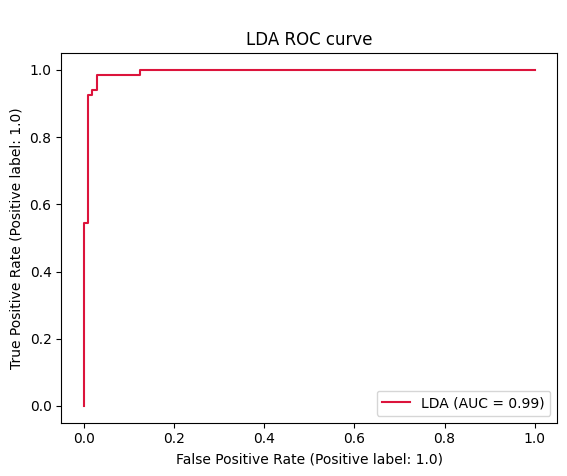

In [10]:
lda = LinearDiscriminantAnalysis(solver="eigen", shrinkage=None)
road(lda, 'LDA')

### QDA - QuadraticDiscriminantAnalysis

QDA model accuracy (train)): 0.949748743718593


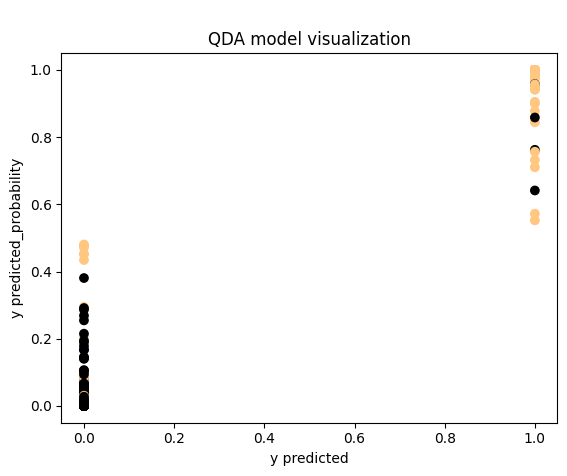


Classification metrics:
QDA_accuracy_score : 0.9649
QDA_f1_score : 0.9559
QDA_precision_score : 0.9286
QDA_recall_score : 0.9848

QDA_cnf_matrix
[[0.58479532 0.02923977]
 [0.00584795 0.38011696]]


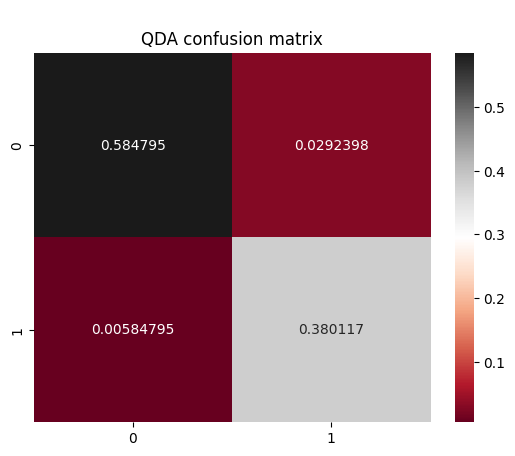

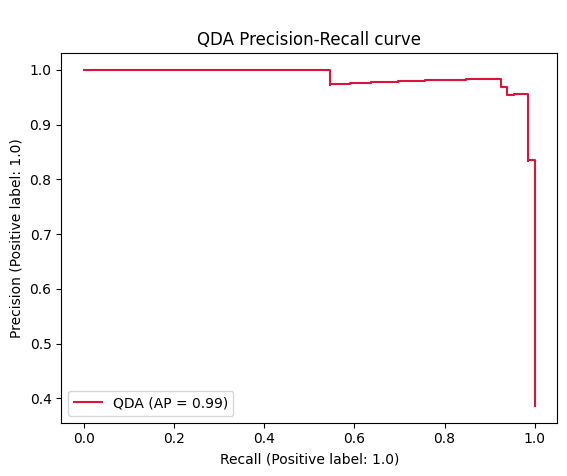

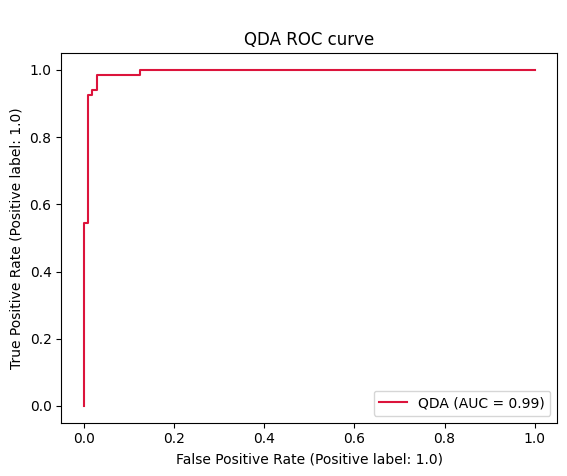

In [11]:
qda = QuadraticDiscriminantAnalysis()
road(qda, 'QDA')

### SVM - Support Vector Machines

SVC model accuracy (train)): 0.9346733668341709


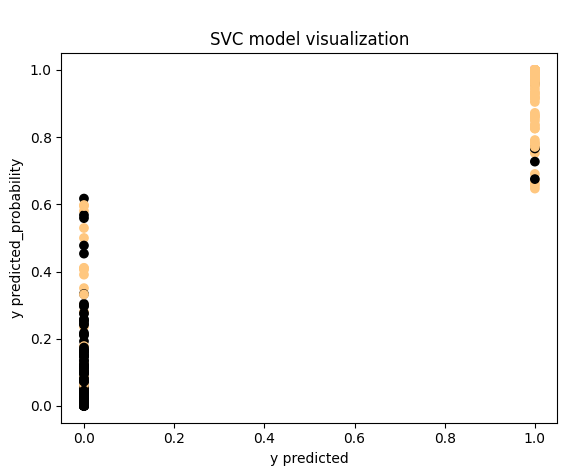

SVC.coef :
 [[ 4.23090287  2.37186054  0.06931121 -0.50740376  1.83109249  3.70886942
   2.46016126  0.91095597]]
SVC.intercept : [-6.25056216]

Classification metrics:
SVC_accuracy_score : 0.9708
SVC_f1_score : 0.9618
SVC_precision_score : 0.9692
SVC_recall_score : 0.9545

SVC_cnf_matrix
[[0.60233918 0.01169591]
 [0.01754386 0.36842105]]


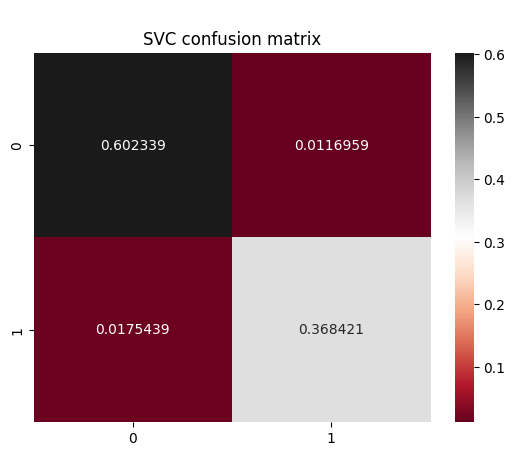

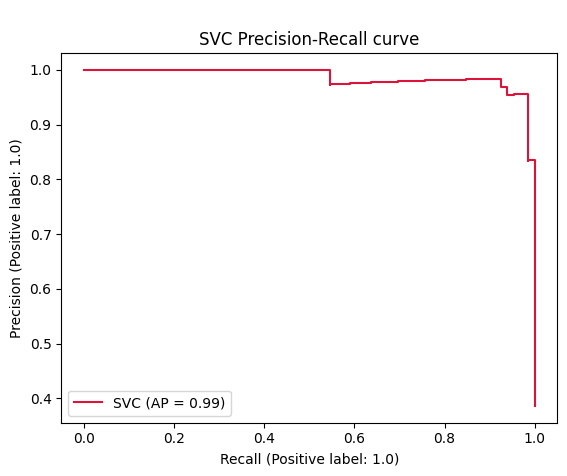

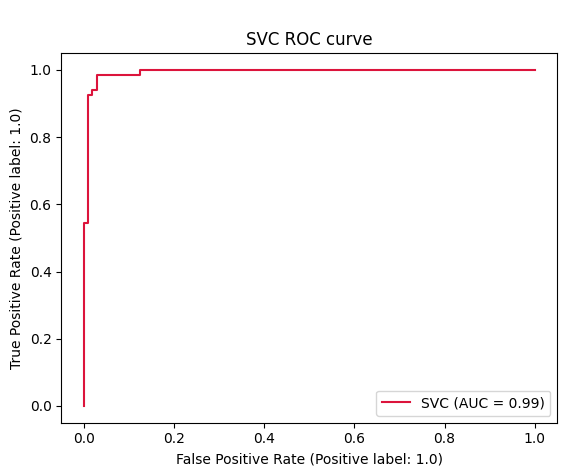

In [12]:
svc = svm.SVC(C=1.0, kernel="linear", degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, 
              cache_size=200, class_weight=None, verbose=False, max_iter=-1, break_ties=False, random_state=None) 
road(svc, 'SVC')

### GNB - Gaussian Naive Bayes

GNB model accuracy (train)): 0.914572864321608


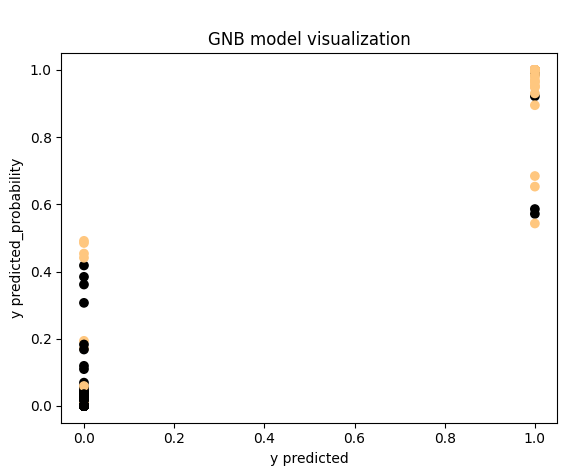


Classification metrics:
GNB_accuracy_score : 0.9181
GNB_f1_score : 0.8986
GNB_precision_score : 0.8611
GNB_recall_score : 0.9394

GNB_cnf_matrix
[[0.55555556 0.05847953]
 [0.02339181 0.3625731 ]]


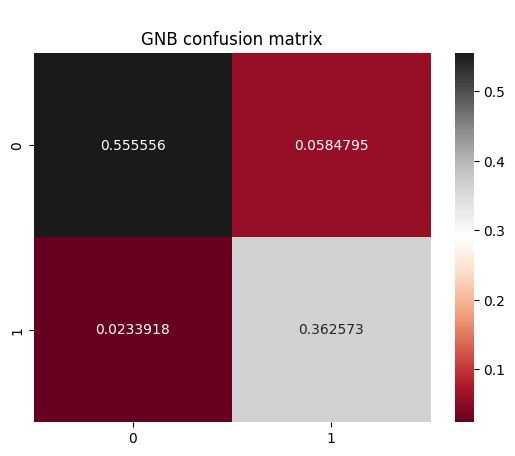

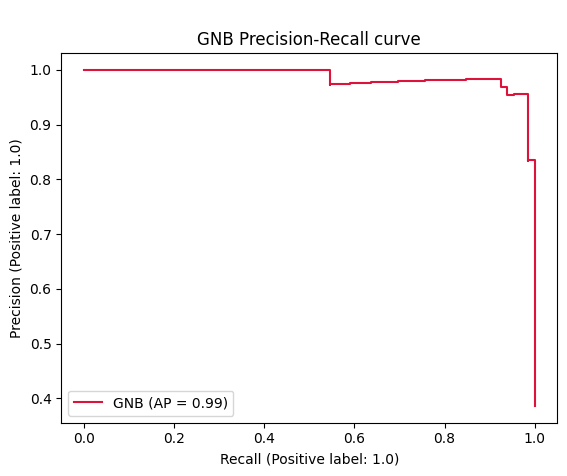

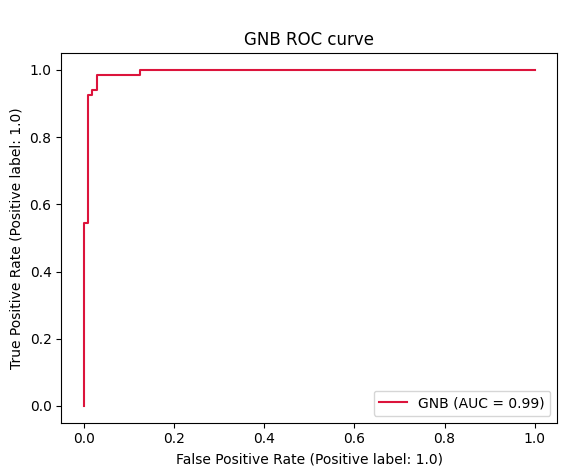

In [13]:
gnb = GaussianNB()
road(gnb, 'GNB')

### MODEL COMPARISONS

In [14]:
# confusion matrix transformation to separate lists
b, b_false, m, m_false = conf_matrix_transformation(cnf_matrix_)

# table to compare estimators
estimator_qual = pd.DataFrame({'estimator' : estimator_, 'accuracy': accuracy_, 'f1': f1_, 
                               'precision': precision_, 'recall': recall_, 
                               'B_pred': b, 'B_false_pred': b_false, 'M_pred': m, 'M_false_pred': m_false})
estimator_qual

,estimator,accuracy,f1,precision,recall,B_pred,B_false_pred,M_pred,M_false_pred
0,LGR,0.959064,0.945736,0.968254,0.924242,0.602339,0.011696,0.356725,0.029240
1,LDA,0.953216,0.936508,0.983333,0.893939,0.608187,0.005848,0.345029,0.040936
2,QDA,0.964912,0.955882,0.928571,0.984848,0.584795,0.029240,0.380117,0.005848
3,SVC,0.970760,0.961832,0.969231,0.954545,0.602339,0.011696,0.368421,0.017544
4,GNB,0.918129,0.898551,0.861111,0.939394,0.555556,0.058480,0.362573,0.023392


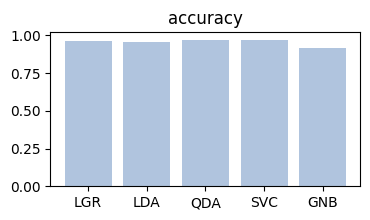

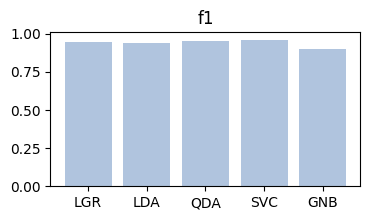

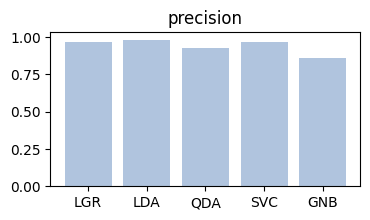

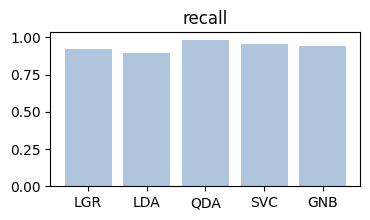

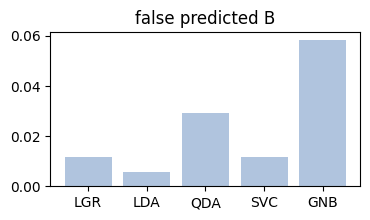

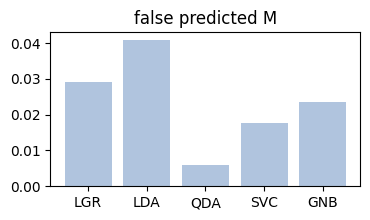

In [15]:
# metrics comparison
metrics = [accuracy_, f1_, precision_, recall_]
titles=('accuracy','f1', 'precision','recall')
metrics_compar_plot(metrics, titles)  

# false-true prediction balance
ft = [b_false, m_false]
ft_titles = ['false predicted B', 'false predicted M']
metrics_compar_plot(ft, ft_titles)

### STACKING
joining of lda, qda and SVC models

Stack model accuracy (train)): 0.9623115577889447


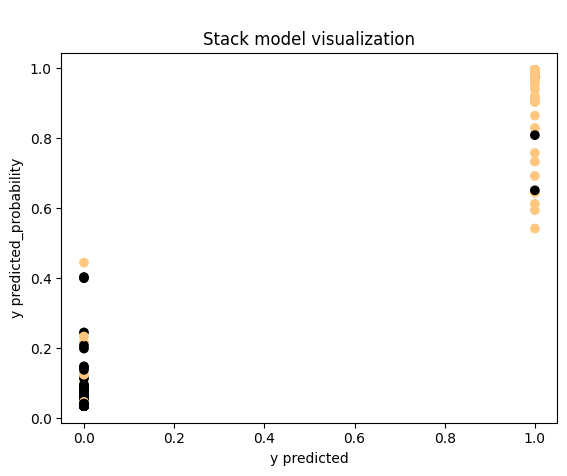


Classification metrics:
Stack_accuracy_score : 0.9825
Stack_f1_score : 0.9774
Stack_precision_score : 0.9701
Stack_recall_score : 0.9848

Stack_cnf_matrix
[[0.60233918 0.01169591]
 [0.00584795 0.38011696]]


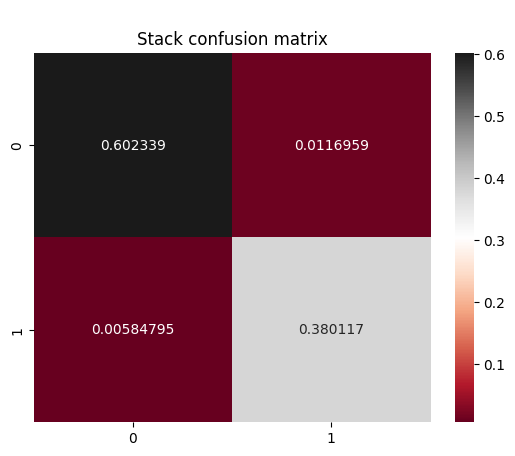

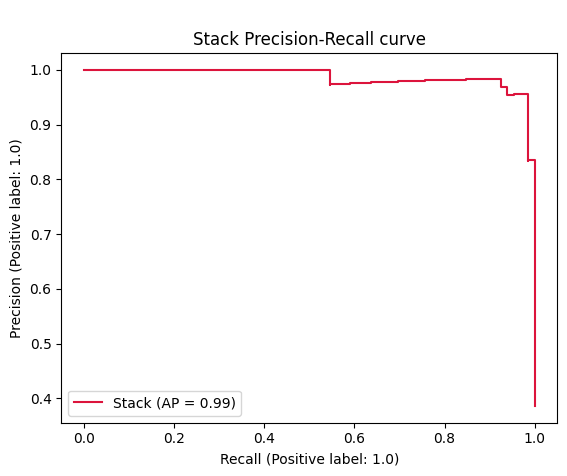

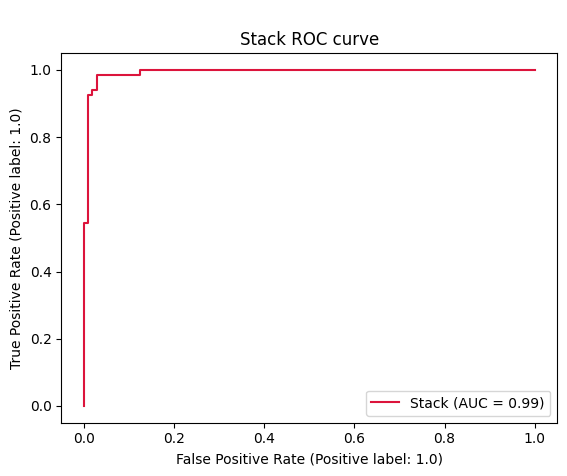

In [16]:
estimators = [('lda', LinearDiscriminantAnalysis()), ('qda', QuadraticDiscriminantAnalysis())] 
stacking_model = StackingClassifier(estimators=estimators, 
                                    final_estimator=SVC(C=1.0, kernel="linear", degree=3, gamma='scale', probability=True))
road(stacking_model, 'Stack')

In [17]:
# confusion matrix transformation to separate lists
b, b_false, m, m_false = conf_matrix_transformation(cnf_matrix_)

# table to compare estimators
estimator_qual = pd.DataFrame({'estimator' : estimator_, 'accuracy': accuracy_, 'f1': f1_, 
                               'precision': precision_, 'recall': recall_, 
                               'B_pred': b, 'B_false_pred': b_false, 'M_pred': m, 'M_false_pred': m_false})
estimator_qual

,estimator,accuracy,f1,precision,recall,B_pred,B_false_pred,M_pred,M_false_pred
0,LGR,0.959064,0.945736,0.968254,0.924242,0.602339,0.011696,0.356725,0.029240
1,LDA,0.953216,0.936508,0.983333,0.893939,0.608187,0.005848,0.345029,0.040936
2,QDA,0.964912,0.955882,0.928571,0.984848,0.584795,0.029240,0.380117,0.005848
3,SVC,0.970760,0.961832,0.969231,0.954545,0.602339,0.011696,0.368421,0.017544
4,GNB,0.918129,0.898551,0.861111,0.939394,0.555556,0.058480,0.362573,0.023392
5,Stack,0.982456,0.977444,0.970149,0.984848,0.602339,0.011696,0.380117,0.005848


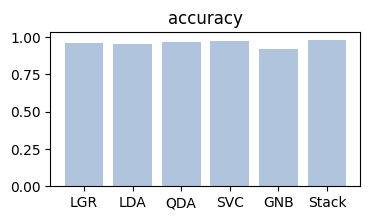

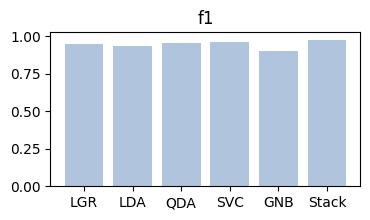

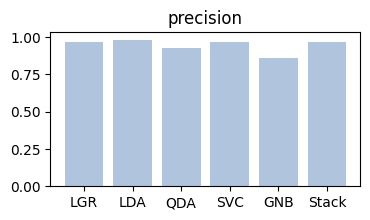

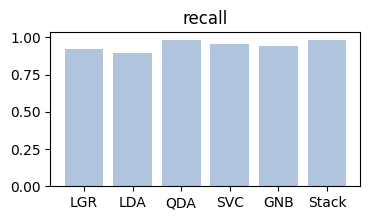

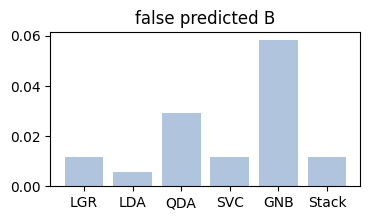

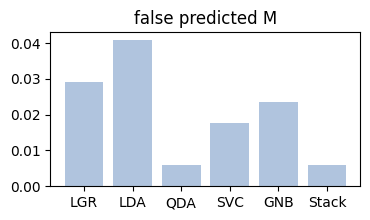

In [18]:
# metrics comparison
metrics = [accuracy_, f1_, precision_, recall_]
titles=('accuracy','f1', 'precision','recall')
metrics_compar_plot(metrics, titles)  

# false-true prediction balance
ft = [b_false, m_false]
ft_titles = ['false predicted B', 'false predicted M']
metrics_compar_plot(ft, ft_titles)

#### The best models: Stack, qda, lda